In [1]:
!pip install python-docx

In [1]:
print("Hello World!")

Hello World!


In [2]:
pwd

'C:\\Users\\Ukachi\\Documents\\DSN\\Python for Statistics\\Working Directory'

In [2]:
import pandas as pd
import io
import csv
from docx import Document

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

def read_docx_tables(filename, tab_id=None, **kwargs):
    """
    parse table(s) from a Word Document (.docx) into Pandas DataFrame(s)

    Parameters:
        filename:   file name of a Word Document

        tab_id:     parse a single table with the index: [tab_id] (counting from 0).
                    When [None] - return a list of DataFrames (parse all tables)

        kwargs:     arguments to pass to `pd.read_csv()` function

    Return: a single DataFrame if tab_id != None or a list of DataFrames otherwise
    """
    def read_docx_tab(tab, **kwargs):
        vf = io.StringIO()
        writer = csv.writer(vf)
        for row in tab.rows:
            writer.writerow(cell.text for cell in row.cells)
        vf.seek(0)
        return pd.read_csv(vf, **kwargs)

    doc = Document(filename)
    if tab_id is None:
        return [read_docx_tab(tab, **kwargs) for tab in doc.tables]
    else:
        try:
            return read_docx_tab(doc.tables[tab_id], **kwargs)
        except IndexError:
            print('Error: specified [tab_id]: {}  does not exist.'.format(tab_id))
            raise

In [3]:
dfs = read_docx_tables("word_document.docx")

In [7]:
table_excel = pd.read_excel("excel_file.xlsx", sheet_name="Sheet1")

In [8]:
table_excel

,Crop,Production,Unnamed: 2,Unnamed: 3,Land Area,Unnamed: 5,Unnamed: 6,2014,Unnamed: 8,Unnamed: 9,2015,Unnamed: 11,Unnamed: 12
0,NaN,2014.0,2015.0,% Change,2014.0,2015.0,% Change,Production,Land Area,Yield,Production,Land Area,Yield
1,Maize,10790.6,10478.0,-2.9,5849.8,5741.9,-1.84,10790.6,5849.8,1.845,10478,5741.88,1.825
2,Sorghum,6741.1,6339.9,-5.95,5401.7,4964.8,-8.69,6741.1,5401.7,1.248,6339.87,4964.83,1.277
3,Rice,6769.0,7751.6,14.52,3067.4,3150.0,2.69,6769,3067.44,2.207,7751.61,3150.02,2.461
4,Ginger,58.9,61.7,4.78,145.2,162.9,12.18,58.89,145.18,0.406,61.7,162.87,0.379
5,Yam,46622.0,47137.0,1.1,3067.7,3179.7,3.61,46622,3067.7,15.198,47137,3179.73,14.824
6,Groundnut,3413.1,3532.1,3.49,2670.1,2566.3,-3.89,3413.1,2670.13,1.278,3532.06,2566.33,1.376
7,Millet,1720.9,1678.4,-2.47,1500.2,1446.1,-3.61,1720.9,1500.2,1.147,1678.37,1446.1,1.161
8,Cassava,53782.8,57575.7,7.05,8976.9,9170.8,2.16,53782.8,8976.9,5.991,57575.7,9170.8,6.278
9,Cowpea,2160.9,2306.2,6.72,3668.1,3635.7,-0.88,2160.9,3668.1,0.589,2306.16,3635.74,0.634


In [9]:
# Load the first table
table_word = dfs[0]

In [10]:
table_word

,Crop,Production,Production.1,Production.2,Land Area,Land Area.1,Land Area.2,2014,2014.1,2014.2,2015,2015.1,2015.2
0,Crop,2014.0,2015.0,% Change,2014.0,2015.0,% Change,Production,Land Area,Yield,Production,Land Area,Yield
1,Maize,10790.6,10478.0,-2.9,5849.8,5741.9,-1.84,10790.6,5849.8,1.845,10477.96,5741.88,1.825
2,Sorghum,6741.1,6339.9,-5.95,5401.7,4964.8,-8.69,6741.1,5401.7,1.248,6339.87,4964.83,1.277
3,Rice,6769.0,7751.6,14.52,3067.4,3150.0,2.69,6769,3067.44,2.207,7751.61,3150.02,2.461
4,Ginger,58.9,61.7,4.78,145.2,162.9,12.18,58.89,145.18,0.406,61.7,162.87,0.379
5,Yam,46622.0,47137.0,1.1,3067.7,3179.7,3.61,46622,3067.7,15.198,47137,3179.73,14.824
6,Groundnut,3413.1,3532.1,3.49,2670.1,2566.3,-3.89,3413.1,2670.13,1.278,3532.06,2566.33,1.376
7,Millet,1720.9,1678.4,-2.47,1500.2,1446.1,-3.61,1720.9,1500.2,1.147,1678.37,1446.1,1.161
8,Cassava,53782.8,57575.7,7.05,8976.9,9170.8,2.16,53782.8,8976.9,5.991,57575.73,9170.8,6.278
9,Cowpea,2160.9,2306.2,6.72,3668.1,3635.7,-0.88,2160.9,3668.1,0.589,2306.16,3635.74,0.634


In [11]:
# Restructure the table

new_table = pd.DataFrame()

new_table["Crop"] = table_1["Crop"][1:]
new_table["Year"] = "2014"
new_table["Production"] = table_1["Production"][1:]
new_table["Land_Area"] = table_1["Land Area"][1:]
new_table["Yeild"] = table_1["2014.2"][1:]

In [12]:
len(new_table)

16

In [13]:
new_table

,Crop,Year,Production,Land_Area,Yeild
1,Maize,2014,10790.6,5849.8,1.845
2,Sorghum,2014,6741.1,5401.7,1.248
3,Rice,2014,6769.0,3067.4,2.207
4,Ginger,2014,58.9,145.2,0.406
5,Yam,2014,46622.0,3067.7,15.198
6,Groundnut,2014,3413.1,2670.1,1.278
7,Millet,2014,1720.9,1500.2,1.147
8,Cassava,2014,53782.8,8976.9,5.991
9,Cowpea,2014,2160.9,3668.1,0.589
10,Cotton,2014,222.7,489.3,0.455


In [14]:
new_table_2 = pd.DataFrame()
new_table_2["Crop"] = table_1["Crop"][1:]
new_table_2["Year"] = "2015"
new_table_2["Production"] = table_1["Production.1"][1:]
new_table_2["Land_Area"] = table_1["Land Area.1"][1:]
new_table_2["Yeild"] = table_1["2015.2"][1:] 

In [15]:
len(new_table_2)

16

In [16]:
new_table_2

,Crop,Year,Production,Land_Area,Yeild
1,Maize,2015,10478.0,5741.9,1.825
2,Sorghum,2015,6339.9,4964.8,1.277
3,Rice,2015,7751.6,3150.0,2.461
4,Ginger,2015,61.7,162.9,0.379
5,Yam,2015,47137.0,3179.7,14.824
6,Groundnut,2015,3532.1,2566.3,1.376
7,Millet,2015,1678.4,1446.1,1.161
8,Cassava,2015,57575.7,9170.8,6.278
9,Cowpea,2015,2306.2,3635.7,0.634
10,Cotton,2015,179.1,428.7,0.418


In [18]:
frames = [new_table, new_table_2]

new_structure = pd.concat(frames, ignore_index=True)

In [19]:
new_structure

,Crop,Year,Production,Land_Area,Yeild
0,Maize,2014,10790.6,5849.8,1.845
1,Sorghum,2014,6741.1,5401.7,1.248
2,Rice,2014,6769.0,3067.4,2.207
3,Ginger,2014,58.9,145.2,0.406
4,Yam,2014,46622.0,3067.7,15.198
5,Groundnut,2014,3413.1,2670.1,1.278
6,Millet,2014,1720.9,1500.2,1.147
7,Cassava,2014,53782.8,8976.9,5.991
8,Cowpea,2014,2160.9,3668.1,0.589
9,Cotton,2014,222.7,489.3,0.455


In [20]:
new_structure["Yeild"] =  new_structure["Yeild"].astype(float)

In [21]:
new_structure["log_Production"] = np.log(new_structure["Production"])

In [22]:
new_structure

,Crop,Year,Production,Land_Area,Yeild,log_Production
0,Maize,2014,10790.6,5849.8,1.845,9.286431
1,Sorghum,2014,6741.1,5401.7,1.248,8.815978
2,Rice,2014,6769.0,3067.4,2.207,8.820109
3,Ginger,2014,58.9,145.2,0.406,4.075841
4,Yam,2014,46622.0,3067.7,15.198,10.749828
5,Groundnut,2014,3413.1,2670.1,1.278,8.135376
6,Millet,2014,1720.9,1500.2,1.147,7.450603
7,Cassava,2014,53782.8,8976.9,5.991,10.892709
8,Cowpea,2014,2160.9,3668.1,0.589,7.678280
9,Cotton,2014,222.7,489.3,0.455,5.405826


In [26]:
new_structure.head(3)

,Crop,Year,Production,Land_Area,Yeild,log_Production
0,Maize,2014,10790.6,5849.8,1.845,9.286431
1,Sorghum,2014,6741.1,5401.7,1.248,8.815978
2,Rice,2014,6769.0,3067.4,2.207,8.820109


In [32]:
new_structure["Production"].min()

58.9

In [35]:
table_2014 = new_structure[new_structure["Year"] == "2014"]

In [38]:
table_2014["Production"].min()

58.9

In [39]:
table_2015 = new_structure[new_structure["Year"] == "2015"]

In [41]:
table_2015["Production"].min()

61.7

In [42]:
def max_production(data, year):
    table_year = data[data["Year"] == year]
    max_product = table_year["Production"].max()
    return max_product

In [44]:
max_production(new_structure, "2015")

57575.7

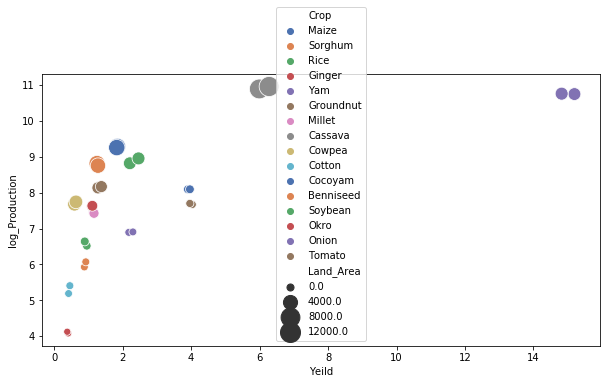

In [23]:
plt.figure(figsize=(10,5));
sns.scatterplot(data=new_structure, x="Yeild", 
                y="log_Production", 
                hue="Crop", 
                size="Land_Area", 
                sizes=(50,400),
               palette="deep")

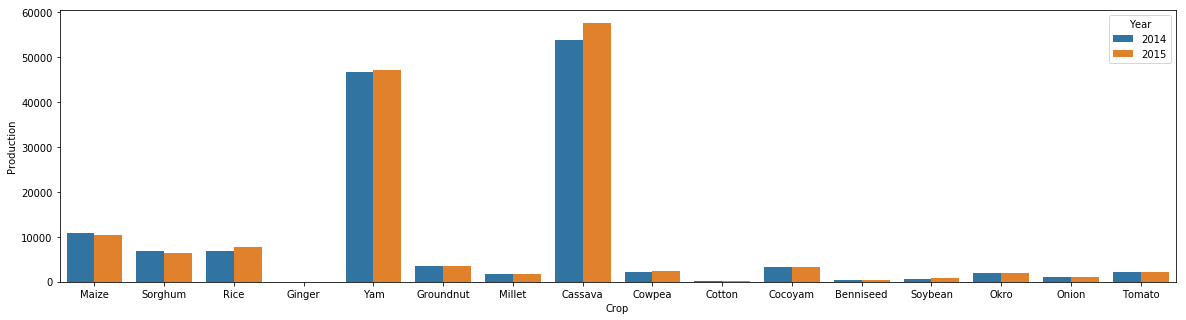

In [45]:
plt.figure(figsize=(20,5));
ax = sns.barplot(x="Crop", y="Production", hue="Year", data=new_structure)

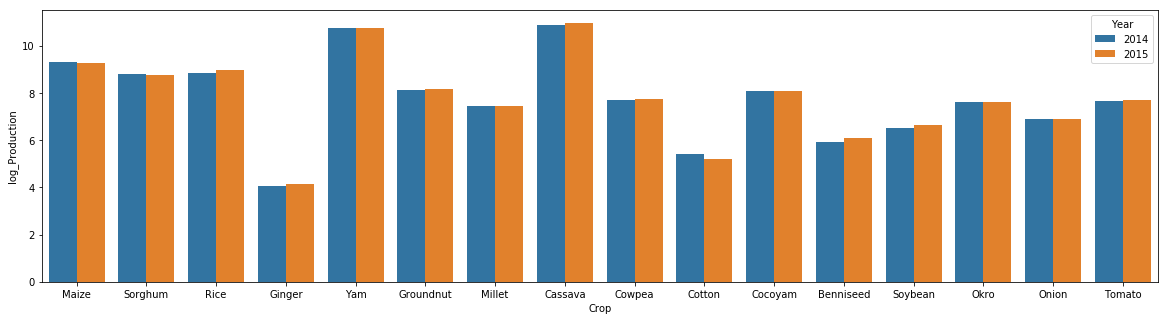

In [51]:
# We use the log for better visualizations
plt.figure(figsize=(20,5));
ax = sns.barplot(x="Crop", y="log_Production", hue="Year", data=new_structure)

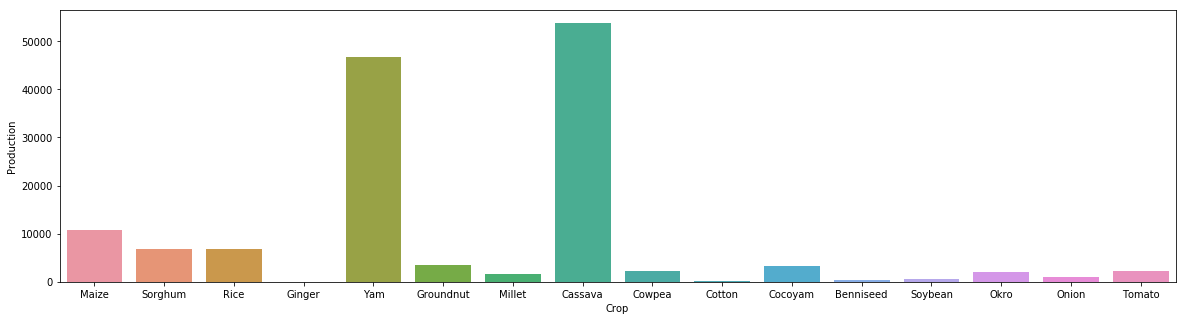

In [52]:
# Bar chart
plt.figure(figsize=(20,5));

bar_chart_1 = sns.barplot(x=table_1["Crop"][1:], y=table_1["Production"][1:], data=table_1)





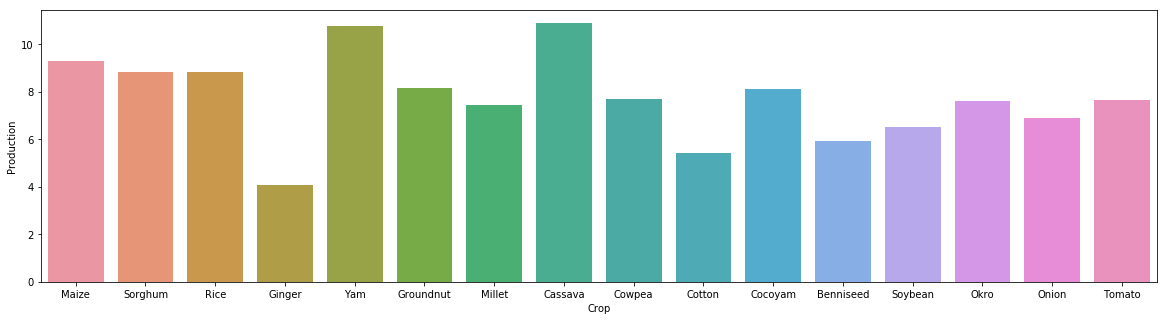

In [53]:
plt.figure(figsize=(20,5));

bar_chart_1 = sns.barplot(x=table_1["Crop"][1:], y=np.log(table_1["Production"][1:]), data=table_1)

In [ ]:
plt.figure(figsize=(20,5));
bar_chart_2 = sns.barplot(x=table_1["Crop"][1:], y=np.log(table_1["Production.1"][1:]), data=table_1)

In [ ]:
plt.figure(figsize=(20,5));
bar_chart_2 = sns.barplot(x=table_1["Crop"][1:], y=table_1["Production.1"][1:], data=table_1)

In [ ]:
# As we can see Ginger has no value or little value to solve this we can scale the values using
# log

log_y = np.log(table_1["Production.1"][1:].values)

In [ ]:
plt.figure(figsize=(20,5));
bar_chart_2 = sns.barplot(x=table_1["Crop"][1:], y=log_y, data=table_1)

In [ ]:
table_1.dtypes

Use Plotly

Use Line charts

Integrate to website - this will also carry information about the following:

Max State:
Min State:
Average State:

Geoplotly information



In [18]:
# Load second table
table_2 = dfs[1] 
table_2.head()

,LIVESTOCK POPULATION BY STATE,LIVESTOCK POPULATION BY STATE.1,LIVESTOCK POPULATION BY STATE.2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,CHICKEN POPULATION BY STATE.,CHICKEN POPULATION BY STATE.,CHICKEN POPULATION BY STATE.,NaN,NaN,NaN,NaN
1,STATE,2010,2011,2012,2013,2014,2015
2,Abia,"740,122","795,631","855,303","919,451","988,410","1,062,541"
3,Adamawa,"222,032","238,684","256,586","275,830","296,517","318,756"
4,Akwa-Ibom,"1,732,067","1,861,972","2,001,620","2,151,741","2,313,122","2,486,606"


In [54]:
data_2 = pd.DataFrame()

data_2["State"] = table_2["LIVESTOCK POPULATION BY STATE"][2:]

data_2["2010"] = table_2["LIVESTOCK POPULATION BY STATE.1"][2:]
data_2["2011"] = table_2["LIVESTOCK POPULATION BY STATE.2"][2:]
data_2["2012"] = table_2["Unnamed: 3"][2:]
data_2["2013"] = table_2["Unnamed: 4"][2:]
data_2["2014"] = table_2["Unnamed: 5"][2:]
data_2["2015"] = table_2["Unnamed: 6"][2:]

In [55]:
data_2.head()

,State,2010,2011,2012,2013,2014,2015
2,Abia,"740,122","795,631","855,303","919,451","988,410","1,062,541"
3,Adamawa,"222,032","238,684","256,586","275,830","296,517","318,756"
4,Akwa-Ibom,"1,732,067","1,861,972","2,001,620","2,151,741","2,313,122","2,486,606"
5,Anambra,"2,281,450","2,452,559","2,636,501","2,834,238","3,046,806","3,275,317"
6,Bauchi,"2,914,203","3,132,768","3,367,726","3,620,305","3,891,828","4,183,715"


In [22]:
def convert(entry):
    if entry == '\xa0':
        return 0
    else:
        my_float = float(entry.replace(',',''))
        return my_float

In [23]:
bar_chart = sns.barplot(x = "State", y="2010", data=data_2)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
data_2.columns

In [56]:
# Conver the data types to enable them to be plotted
for col in data_2.columns[1:]:
    data_2[col] = data_2[col].apply(convert)

In [57]:
data_2_use = data_2.iloc[:-1,:]

In [58]:
data_2_use.tail()

,State,2010,2011,2012,2013,2014,2015
34,Sokoto,2975819.0,3199005.0,3438931.0,3696851.0,3974114.0,4272173.0
35,Taraba,3804558.0,4089900.0,4396642.0,4726391.0,5080870.0,5461935.0
36,Yobe,4892989.0,5259963.0,5654460.0,6078545.0,6534436.0,7024519.0
37,Zamfara,5892757.0,6334714.0,6809817.0,7320554.0,7869595.0,8459815.0
38,FCT,1322558.0,1421750.0,1528381.0,1643010.0,1766235.0,1898703.0


In [27]:
states = data_2_use["State"]

In [289]:
for i, state in enumerate(states):
    print(f"{i} = {state}")

0 = Abia 
1 = Adamawa 
2 = Akwa-Ibom 
3 = Anambra 
4 = Bauchi 
5 = Bayelsa 
6 = Benue 
7 = Borno 
8 = Cross River 
9 = Delta 
10 = Ebonyi 
11 = Edo 
12 = Ekiti 
13 = Enugu 
14 = Gombe 
15 = Imo 
16 = Jigawa 
17 = Kaduna 
18 = Kano 
19 = Katsina 
20 = Kebbi 
21 = Kogi 
22 = Kwara 
23 = Lagos 
24 = Nasarawa 
25 = Niger 
26 = Ogun 
27 = Ondo 
28 = Osun 
29 = Oyo 
30 = Plateau 
31 = Rivers 
32 = Sokoto 
33 = Taraba 
34 = Yobe 
35 = Zamfara 
36 = FCT 


### Interactive vs. Non interactive

In [59]:
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

# read a .csv file into a pandas DataFrame:
# df = pd.read_csv('../data/population.csv', index_col=0)

states = data_2_use["State"]

# create traces
traces = [go.Scatter(
    x = data_2_use.columns[1:],
    y = data_2_use.iloc[i, 1:],
    mode = 'markers+lines',
    name = state
) for i, state in enumerate(states)]

layout = go.Layout(
title = 'Chicken Population per State'
    )
          
fig = go.Figure(data=traces,layout=layout)
pyo.plot(fig, filename='chicken_population_per_state.html')

'chicken_population_per_state.html'

In [29]:
the_data = pd.melt(data_2_use, id_vars=['State'], value_vars=['2010', '2011', '2012', '2013', '2014', '2015'],
        var_name="Year", value_name='chicken_population')

In [218]:
the_data.head()

,State,Year,chicken_population
0,Abia,2010,740122.0
1,Adamawa,2010,222032.0
2,Akwa-Ibom,2010,1732067.0
3,Anambra,2010,2281450.0
4,Bauchi,2010,2914203.0


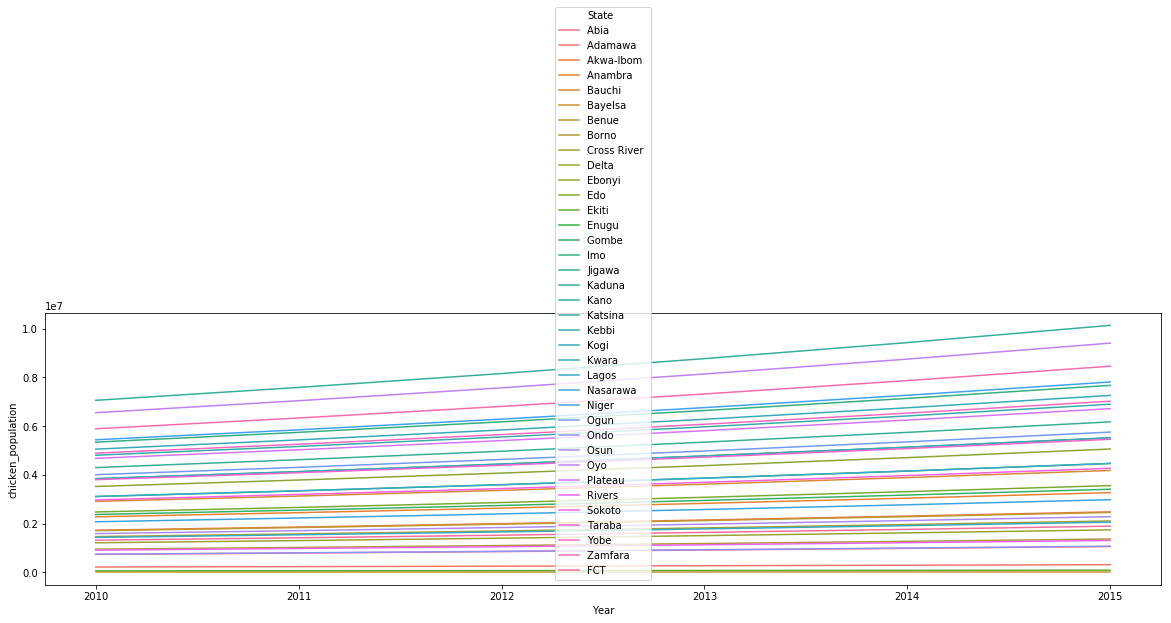

In [227]:
plt.figure(figsize=(20,5));
sns.lineplot(data=the_data, x="Year", y="chicken_population",hue="State")

In [192]:
states = data_2_T.iloc[0,:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

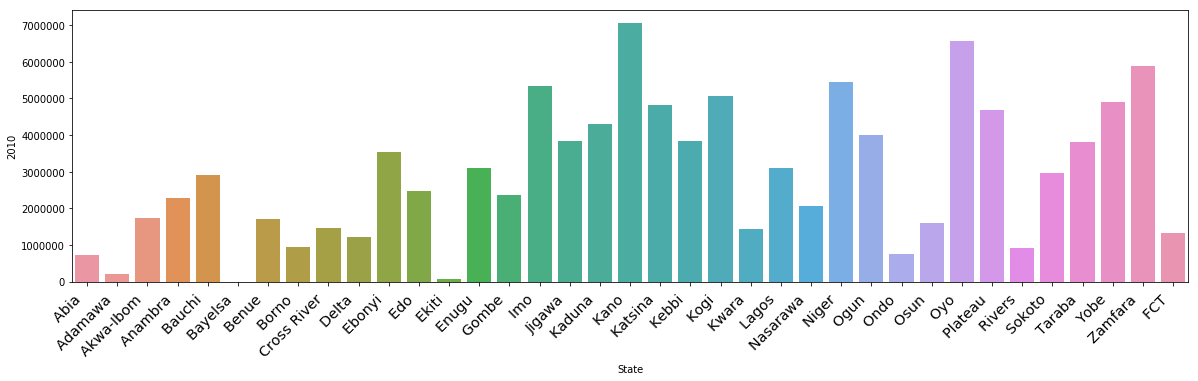

In [60]:
plt.figure(figsize=(20,5));
bar_chart = sns.barplot(x = data_2["State"][:-1], y=data_2["2010"][:-1], data=data_2)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

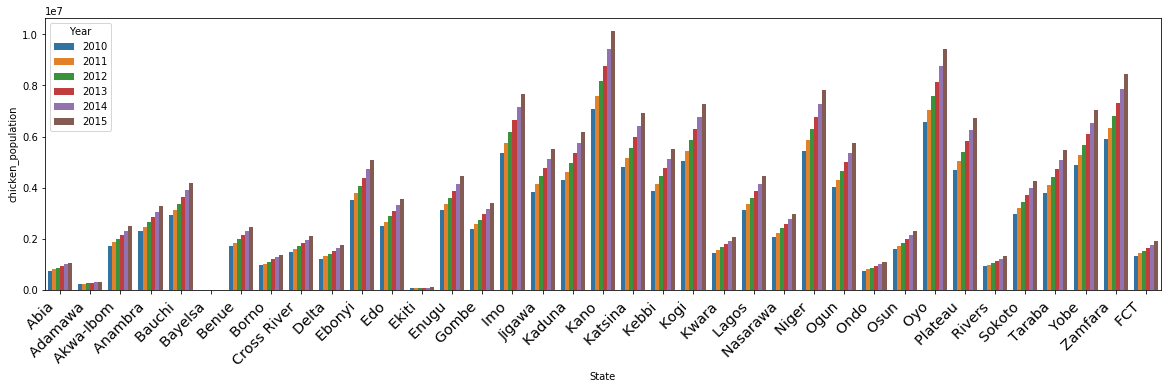

In [31]:
plt.figure(figsize=(20,5));
bar_chart = sns.barplot(x = "State", y="chicken_population", hue="Year", data=the_data)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [32]:
the_data["log_chicken_population"] = np.log(the_data["chicken_population"])

C:\Users\Ukachi\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

divide by zero encountered in log



In [231]:
the_data.head()

,State,Year,chicken_population,log_chicken_population
0,Abia,2010,740122.0,13.514570
1,Adamawa,2010,222032.0,12.310577
2,Akwa-Ibom,2010,1732067.0,14.364826
3,Anambra,2010,2281450.0,14.640322
4,Bauchi,2010,2914203.0,14.885107


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

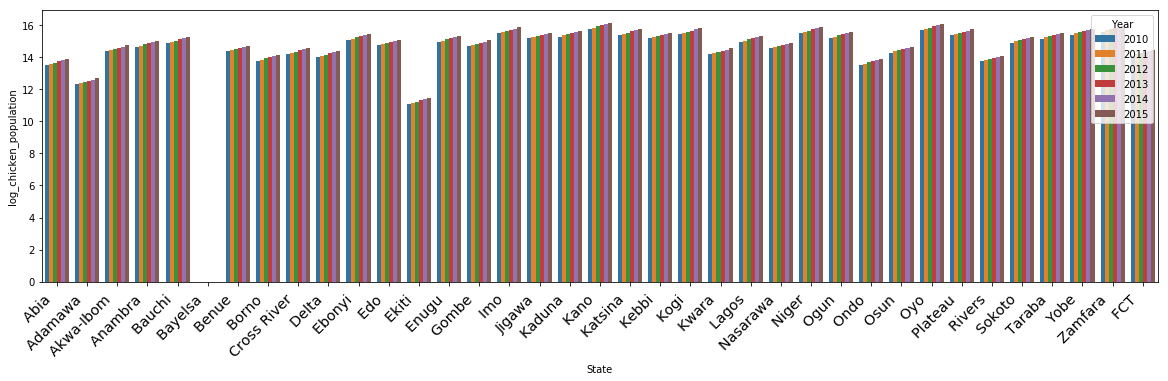

In [232]:
plt.figure(figsize=(20,5));
bar_chart = sns.barplot(x = "State", y="log_chicken_population", hue="Year", data=the_data)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [228]:
the_data.head()

,State,Year,chicken_population
0,Abia,2010,740122.0
1,Adamawa,2010,222032.0
2,Akwa-Ibom,2010,1732067.0
3,Anambra,2010,2281450.0
4,Bauchi,2010,2914203.0


In [207]:
df

,Country,Year,Value
0,Thailand,1989,8
1,Thailand,1990,3
2,Vietnam,1989,10
3,Vietnam,1990,4
4,India,1989,3
5,India,1990,0


In [233]:
data_3 = dfs[2]

In [234]:
data_3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,State,Sorghum,Maize,Rice,Ginger,Yam,Ground nut,Millet,Cassava,Cowpea,Cotton,Cocoyam,Benniseed,Soyabean,Okro,Onion,Tomato,NaN
1,1,Abia,NaN,9650,3240,NaN,69960,840,0,177380,4640,0,14260,NaN,NaN,1850,NaN,1420,NaN
2,2,Adamawa,39400,40620,6750,NaN,93560,8900,2070,2320,9230,1520,7290,920,2170,870,7680,3040,NaN
3,3,Akwa Ibom,0,10490,190,NaN,248630,320,0,144310,4480,0,26340,0,0,21470,0,0,NaN
4,4,Anambra,0,8940,12020,NaN,89230,NaN,0,167220,4500,0,16450,0,NaN,1900,0,1170,NaN
5,5,Bauchi,37970,40690,8830,NaN,0,46690,6620,1900,8120,6160,30,800,2430,820,8800,19390,NaN
6,6,Bayelsa,0,9880,12290,NaN,14440,NaN,0,148690,3600,0,14910,0,0,12140,0,0,NaN
7,7,Benue,19650,47860,39000,19,207620,21280,6570,372480,8400,0,4190,5900,19020,5630,4520,3230,NaN
8,8,Borno,47460,31020,14400,NaN,0,20150,5920,NaN,7620,3080,NaN,129,NaN,1960,2390,45240,NaN
9,9,Cross River,0,27990,11050,880,283550,1550,NaN,499530,3810,0,29280,0,0,21460,NaN,0,NaN


In [235]:
main_data_3 = data_3.iloc[1:, 1:]

In [242]:
main_data_3.tail()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
34,Sokoto,31590,12880,10330,NaN,0,7030,7640,3400,8980,2330,0,0,960,2390,11620,28580,NaN
35,Taraba,35250,46360,32830,NaN,350500,24560,9490,236640,7480,NaN,0,3330,5760,4610,6220,4960,NaN
36,Yobe,20590,12150,9700,NaN,0,6890,6600,2520,5490,2170,0,290,NaN,900,3900,13210,NaN
37,Zamfara,50240,16950,13940,NaN,990,14180,8980,NaN,8380,4270,0,0,520,3590,9550,13690,NaN
38,NaN,6741100,10790600,6734000,58190,46622000,3413100,1384900,54831600,2137900,299700,3283000,434990,679000,2038800,985400,2143500,NaN


In [237]:
main_data_3.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [247]:
main_data_tidy = main_data_3.rename(columns = dict_names, inplace = False)


In [248]:
main_data_tidy.head()

,State,Sorghum,Maize,Rice,Ginger,Yam,Ground nut,Millet,Cassava,Cowpea,Cotton,Cocoyam,Benniseed,Soyabean,Okro,Onion,Tomato,Unnamed: 18
1,Abia,NaN,9650,3240,NaN,69960,840,0,177380,4640,0,14260,NaN,NaN,1850,NaN,1420,NaN
2,Adamawa,39400,40620,6750,NaN,93560,8900,2070,2320,9230,1520,7290,920,2170,870,7680,3040,NaN
3,Akwa Ibom,0,10490,190,NaN,248630,320,0,144310,4480,0,26340,0,0,21470,0,0,NaN
4,Anambra,0,8940,12020,NaN,89230,NaN,0,167220,4500,0,16450,0,NaN,1900,0,1170,NaN
5,Bauchi,37970,40690,8830,NaN,0,46690,6620,1900,8120,6160,30,800,2430,820,8800,19390,NaN


In [250]:
main_data_tidy.drop(["Unnamed: 18"], axis=1, inplace=True)

In [251]:
main_data_tidy.head()

,State,Sorghum,Maize,Rice,Ginger,Yam,Ground nut,Millet,Cassava,Cowpea,Cotton,Cocoyam,Benniseed,Soyabean,Okro,Onion,Tomato
1,Abia,NaN,9650,3240,NaN,69960,840,0,177380,4640,0,14260,NaN,NaN,1850,NaN,1420
2,Adamawa,39400,40620,6750,NaN,93560,8900,2070,2320,9230,1520,7290,920,2170,870,7680,3040
3,Akwa Ibom,0,10490,190,NaN,248630,320,0,144310,4480,0,26340,0,0,21470,0,0
4,Anambra,0,8940,12020,NaN,89230,NaN,0,167220,4500,0,16450,0,NaN,1900,0,1170
5,Bauchi,37970,40690,8830,NaN,0,46690,6620,1900,8120,6160,30,800,2430,820,8800,19390


In [244]:
new_name = ["State", "Sorghum", "Maize", "Rice", "Ginger", "Yam", "Ground nut", "Millet",
           "Cassava", "Cowpea", "Cotton", "Cocoyam", "Benniseed", "Soyabean", "Okro", "Onion", "Tomato"]

In [239]:
old_name = list(main_data_3.columns)

In [240]:
old_name

['Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [245]:
dict_names = {}

for old, new in zip(old_name, new_name):
    dict_names[old] = new

In [246]:
dict_names

{'Unnamed: 1': 'State',
 'Unnamed: 2': 'Sorghum',
 'Unnamed: 3': 'Maize',
 'Unnamed: 4': 'Rice',
 'Unnamed: 5': 'Ginger',
 'Unnamed: 6': 'Yam',
 'Unnamed: 7': 'Ground nut',
 'Unnamed: 8': 'Millet',
 'Unnamed: 9': 'Cassava',
 'Unnamed: 10': 'Cowpea',
 'Unnamed: 11': 'Cotton',
 'Unnamed: 12': 'Cocoyam',
 'Unnamed: 13': 'Benniseed',
 'Unnamed: 14': 'Soyabean',
 'Unnamed: 15': 'Okro',
 'Unnamed: 16': 'Onion',
 'Unnamed: 17': 'Tomato'}

In [252]:
pwd

'C:\\Users\\Ukachi\\Documents\\DSN\\Python for Statistics\\Working Directory'

In [254]:
data3_excel = pd.read_excel("excel_file.xlsx", header=1, sheet_name="Sheet3")

In [258]:
data3_excel.drop(["Unnamed: 0"], inplace=True, axis=1)

In [259]:
data3_excel.head()

,State,Sorghum,Maize,Rice,Ginger,Yam,Ground nut,Millet,Cassava,Cowpea,Cotton,Cocoyam,Benniseed,Soyabean,Okro,Onion,Tomato
0,Abia,NaN,9650,3240,NaN,69960,840.0,0.0,177380.0,4640.0,0.0,14260.0,NaN,NaN,1850,NaN,1420.0
1,Adamawa,39400.0,40620,6750,NaN,93560,8900.0,2070.0,2320.0,9230.0,1520.0,7290.0,920.0,2170.0,870,7680.0,3040.0
2,Akwa Ibom,0.0,10490,190,NaN,248630,320.0,0.0,144310.0,4480.0,0.0,26340.0,0.0,0.0,21470,0.0,0.0
3,Anambra,0.0,8940,12020,NaN,89230,NaN,0.0,167220.0,4500.0,0.0,16450.0,0.0,NaN,1900,0.0,1170.0
4,Bauchi,37970.0,40690,8830,NaN,0,46690.0,6620.0,1900.0,8120.0,6160.0,30.0,800.0,2430.0,820,8800.0,19390.0


In [261]:
data3_excel.isnull().sum()

State          1
Sorghum        6
Maize          0
Rice           0
Ginger        32
Yam            0
Ground nut     5
Millet        10
Cassava        2
Cowpea         1
Cotton         3
Cocoyam        1
Benniseed      2
Soyabean       6
Okro           0
Onion         14
Tomato         1
dtype: int64

In [263]:
no_null = data3_excel.fillna(0)

In [269]:
no_null.tail()

,State,Sorghum,Maize,Rice,Ginger,Yam,Ground nut,Millet,Cassava,Cowpea,Cotton,Cocoyam,Benniseed,Soyabean,Okro,Onion,Tomato
33,Sokoto,31590.0,12880,10330,0.0,0,7030.0,7640.0,3400.0,8980.0,2330.0,0.0,0.0,960.0,2390,11620.0,28580.0
34,Taraba,35250.0,46360,32830,0.0,350500,24560.0,9490.0,236640.0,7480.0,0.0,0.0,3330.0,5760.0,4610,6220.0,4960.0
35,Yobe,20590.0,12150,9700,0.0,0,6890.0,6600.0,2520.0,5490.0,2170.0,0.0,290.0,0.0,900,3900.0,13210.0
36,Zamfara,50240.0,16950,13940,0.0,990,14180.0,8980.0,0.0,8380.0,4270.0,0.0,0.0,520.0,3590,9550.0,13690.0
37,Total,6741100.0,10790600,6734000,58190.0,46622000,3413100.0,1384900.0,54831600.0,2137900.0,299700.0,3283000.0,434990.0,679000.0,2038800,985400.0,2143500.0


In [266]:
no_null["State"].replace(0, "Total", inplace=True)